In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown 1WwyO371fkmnxtdJITPQqrOirkdUnfR7L

Downloading...
From: https://drive.google.com/uc?id=1WwyO371fkmnxtdJITPQqrOirkdUnfR7L
To: /content/Matrix_complexity.csv
100% 1.39M/1.39M [00:00<00:00, 136MB/s]


In [ ]:
data = pd.read_csv('/content/Matrix_complexity.csv')
for column in data.columns:
    data[column] = data[column].fillna(data[column].mean())
data['Labels'] = pd.cut(x=data['Labels'], bins=[0, 4, 7, 10], labels=['Low', 'Mid', 'High'])
data

,film,Subj,Alpha_Fz,Alpha_F3,Alpha_F7,Alpha_C3,Alpha_T7,Alpha_Pz,Alpha_P3,Alpha_P7,...,SpEn_O1,SpEn_Oz,SpEn_O2,SpEn_P4,SpEn_P8,SpEn_Cz,SpEn_C4,SpEn_T8,SpEn_F4,SpEn_F8
0,1,1,2.526810,1.913928,4.005514,2.027418,4.022892,1.949431,1.321008,1.879488,...,0.756752,0.731636,0.770763,0.511796,0.747356,0.734549,0.573571,0.666546,0.701854,0.541023
1,1,2,6.010149,3.606064,4.051885,4.523674,4.651910,2.815613,3.860679,5.419934,...,0.588688,0.690308,0.753110,0.658623,0.622934,0.705115,0.694461,0.596211,0.661915,0.626924
2,1,3,2.376723,2.213678,2.865767,3.072331,3.532807,1.990123,2.241788,2.574973,...,0.743003,0.701456,0.737281,0.687757,0.755020,0.690869,0.664579,0.732706,0.671702,0.712289
3,1,4,2.649139,2.270000,3.387474,2.363346,3.756334,2.173137,1.869292,2.943064,...,0.723969,0.708789,0.720716,0.638770,0.747617,0.701575,0.635875,0.704821,0.676821,0.660730
4,1,6,5.108710,2.798086,4.051885,10.953561,5.328705,6.452085,9.667544,10.095658,...,0.678508,0.724328,0.782440,0.802430,0.697681,0.749899,0.768600,0.697917,0.762089,0.740299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,5,21,2.721734,2.798086,4.051885,4.615058,5.328705,4.539253,4.535490,4.689525,...,0.585269,0.577100,0.620849,0.581055,0.602721,0.575033,0.569639,0.581220,0.597664,0.570458
162,3,21,2.721734,2.798086,4.051885,4.615058,5.328705,4.539253,4.535490,4.689525,...,0.585269,0.577100,0.620849,0.581055,0.602721,0.575033,0.569639,0.581220,0.597664,0.570458
163,7,21,2.721734,2.798086,4.051885,4.615058,5.328705,4.539253,4.535490,4.689525,...,0.585269,0.577100,0.620849,0.581055,0.602721,0.575033,0.569639,0.581220,0.597664,0.570458
164,6,21,2.721734,2.798086,4.051885,4.615058,5.328705,4.539253,4.535490,4.689525,...,0.585269,0.577100,0.620849,0.581055,0.602721,0.575033,0.569639,0.581220,0.597664,0.570458


In [ ]:
def split(n, list):
  list[0] = data.loc[(data['film'] == n)].reset_index(drop=True)
  list[2] = data.loc[(data['film'] != n)].reset_index(drop=True)
  print(list[2].shape, list[0].shape)
  list[0] = list[0].sample(frac=1)
  list[2] = list[2].sample(frac=1)

  list[1] = list[0]['Labels']
  list[3] = list[2]['Labels']

  list[0].drop(['Labels', 'Subj', 'film'], axis=1, inplace=True)
  list[2].drop(['Labels', 'Subj', 'film'], axis=1, inplace=True)

In [ ]:
X_test = []
y_test = []
X_train = []
y_train = []
list = [X_test, y_test, X_train, y_train]
split(1, list)
X_test = list[0]
y_test = list[1]
X_train = list[2]
y_train = list[3]

(145, 520) (21, 520)


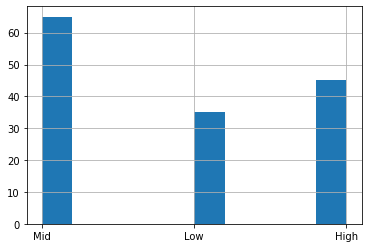

In [ ]:
y_train.hist()

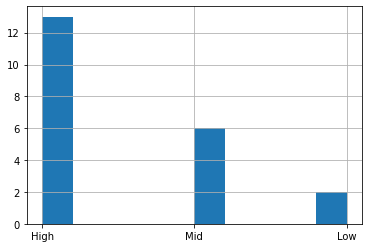

In [ ]:
y_test.hist()

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
max_depth = [5, 6, 7, 8, 9, 10]
min_samples_split = [2, 3, 4, 5]
searcher = GridSearchCV(DTree(class_weight='balanced'), [{"max_depth": max_depth, "min_samples_split":min_samples_split}], cv=5, verbose=3)
searcher.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ..max_depth=5, min_samples_split=2;, score=0.414 total time=   0.0s
[CV 2/5] END ..max_depth=5, min_samples_split=2;, score=0.310 total time=   0.0s
[CV 3/5] END ..max_depth=5, min_samples_split=2;, score=0.414 total time=   0.0s
[CV 4/5] END ..max_depth=5, min_samples_split=2;, score=0.448 total time=   0.0s
[CV 5/5] END ..max_depth=5, min_samples_split=2;, score=0.552 total time=   0.0s
[CV 1/5] END ..max_depth=5, min_samples_split=3;, score=0.483 total time=   0.0s
[CV 2/5] END ..max_depth=5, min_samples_split=3;, score=0.345 total time=   0.0s
[CV 3/5] END ..max_depth=5, min_samples_split=3;, score=0.414 total time=   0.0s
[CV 4/5] END ..max_depth=5, min_samples_split=3;, score=0.345 total time=   0.0s
[CV 5/5] END ..max_depth=5, min_samples_split=3;, score=0.483 total time=   0.0s
[CV 1/5] END ..max_depth=5, min_samples_split=4;, score=0.414 total time=   0.0s
[CV 2/5] END ..max_depth=5, min_samples_split=4

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid=[{'max_depth': [5, 6, 7, 8, 9, 10],
                          'min_samples_split': [2, 3, 4, 5]}],
             verbose=3)

In [ ]:
print(searcher.best_params_["max_depth"], searcher.best_params_["min_samples_split"])

5 2


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score

In [ ]:
def make_report():
  n_films = 9
  accuracy = 0
  report = {'High': {'precision': 0, 'recall': 0, 'f1-score': 0},
            'Low': {'precision': 0, 'recall': 0, 'f1-score': 0},
            'Mid': {'precision': 0, 'recall': 0, 'f1-score': 0},
            'accuracy': 0,
            'macro avg': {'precision': 0, 'recall': 0, 'f1-score': 0},
            'weighted avg': {'precision': 0, 'recall': 0, 'f1-score': 0}}


  X_test = y_test = X_train = y_train = []
  for test_film in range(1, n_films):
    list = [X_test, y_test, X_train, y_train]
    split(test_film, list)
    X_test = list[0]
    y_test = list[1]
    X_train = list[2]
    y_train = list[3]

    model = DTree(
        class_weight='balanced',
        max_depth = searcher.best_params_["max_depth"],
        min_samples_split = searcher.best_params_["min_samples_split"],
        random_state=42).fit(X_train, y_train)
    preds = model.predict(X_test)

    accuracy += balanced_accuracy_score(y_test, preds)
    tmp = classification_report(y_test, preds, output_dict=True)
    for j in report:
      try:
        for k in report[j]:
          report[j][k] += tmp[j][k]
      except:
          report[j] += tmp[j]

  accuracy /= n_films
  for j in report:
    try:
      for k in report[j]:
        report[j][k] /= n_films
    except:
        report[j] /= n_films
      

  print("Balanced accuracy:", accuracy)
  print(report['accuracy'])
  print(report['High'])
  print(report['Mid'])
  print(report['Low'])
  print(report['macro avg'])
  print(report['weighted avg'])


In [ ]:
make_report()

(145, 520) (21, 520)
(146, 520) (20, 520)
(145, 520) (21, 520)
(145, 520) (21, 520)
(145, 520) (21, 520)
(146, 520) (20, 520)
(145, 520) (21, 520)
(145, 520) (21, 520)
Balanced accuracy: 0.32224832780388335
0.3478835978835979
{'precision': 0.3138888888888889, 'recall': 0.24643874643874644, 'f1-score': 0.2741261824595158}
{'precision': 0.4111111111111111, 'recall': 0.4507295173961841, 'f1-score': 0.4231074481074481}
{'precision': 0.2888888888888889, 'recall': 0.2695767195767196, 'f1-score': 0.2513468013468014}
{'precision': 0.33796296296296297, 'recall': 0.32224832780388335, 'f1-score': 0.3161934773045884}
{'precision': 0.3870597127739985, 'recall': 0.3478835978835979, 'f1-score': 0.3529327815042101}


In [ ]:
from tqdm import tqdm_notebook

In [ ]:
models = ['ElasticNet']
metrics = ['MAPE', 'MAE', 'R2']
formes = ['inverted', 'average']
columns = [
    np.array([models[i] for i in range(1) for j in range(3) for k in range(2)]),
    np.array([metrics[j] for i in range(1) for j in range(3) for k in range(2)]),
    np.array([formes[k] for i in range(1) for j in range(3) for k in range(2)]),
]
chans = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
model = DTree(
        class_weight='balanced',
        max_depth = searcher.best_params_["max_depth"],
        min_samples_split = searcher.best_params_["min_samples_split"],
        random_state=42).fit(X_train, y_train)

In [ ]:
selector = SelectFromModel(estimator=model, max_features=50, prefit=True)
X_selected_train = selector.transform(X_train)
X_selected_test = selector.transform(X_test)

In [ ]:
print(X_train.shape)
print(data.shape)
data_selected = data
data_selected = data_selected.drop(['Subj', 'film'], axis=1)
col = data_selected.columns
print(data_selected.shape)
for i in range(data_selected.shape[0]):
  if not selector.get_support()[i]:
    data_selected.drop(col[i], axis=1, inplace=True)

print(data_selected)

(145, 517)
(166, 520)
(166, 518)
     Alpha_ratio_T8   Beta_F7  Beta/(Alpha + Theta)_P8  Beta/Alpha_T7  \
0          0.261488  7.978071                64.133199       5.476810   
1          0.287294  7.243413                 2.919938       0.040720   
2          0.270981  7.834104                14.607906       2.169645   
3          0.263865  8.510815                -2.657870       4.734626   
4          0.278159  7.243413                 2.919938       1.074062   
..              ...       ...                      ...            ...   
161        0.278159  7.243413                 2.919938       1.074062   
162        0.278159  7.243413                 2.919938       1.074062   
163        0.278159  7.243413                 2.919938       1.074062   
164        0.278159  7.243413                 2.919938       1.074062   
165        0.278159  7.243413                 2.919938       1.074062   

     Beta_watch/(Alpha_watch + Theta_relax) - Beta_relax/(Alpha_relax + Theta_relax)_F7  \

In [ ]:
max_depth = [5, 6, 7, 8, 9, 10]
min_samples_split = [2, 3, 4, 5]
searcher = GridSearchCV(DTree(class_weight='balanced'), [{"max_depth": max_depth, "min_samples_split":min_samples_split}], cv=5, verbose=3)
searcher.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ..max_depth=5, min_samples_split=2;, score=0.448 total time=   0.1s
[CV 2/5] END ..max_depth=5, min_samples_split=2;, score=0.414 total time=   0.1s
[CV 3/5] END ..max_depth=5, min_samples_split=2;, score=0.379 total time=   0.1s
[CV 4/5] END ..max_depth=5, min_samples_split=2;, score=0.414 total time=   0.1s
[CV 5/5] END ..max_depth=5, min_samples_split=2;, score=0.414 total time=   0.0s
[CV 1/5] END ..max_depth=5, min_samples_split=3;, score=0.517 total time=   0.0s
[CV 2/5] END ..max_depth=5, min_samples_split=3;, score=0.379 total time=   0.1s
[CV 3/5] END ..max_depth=5, min_samples_split=3;, score=0.414 total time=   0.1s
[CV 4/5] END ..max_depth=5, min_samples_split=3;, score=0.310 total time=   0.1s
[CV 5/5] END ..max_depth=5, min_samples_split=3;, score=0.448 total time=   0.1s
[CV 1/5] END ..max_depth=5, min_samples_split=4;, score=0.448 total time=   0.1s
[CV 2/5] END ..max_depth=5, min_samples_split=4

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid=[{'max_depth': [5, 6, 7, 8, 9, 10],
                          'min_samples_split': [2, 3, 4, 5]}],
             verbose=3)

In [ ]:
make_report()

(145, 520) (21, 520)
(146, 520) (20, 520)
(145, 520) (21, 520)
(145, 520) (21, 520)
(145, 520) (21, 520)
(146, 520) (20, 520)
(145, 520) (21, 520)
(145, 520) (21, 520)
Balanced accuracy: 0.36221011498789274
0.3751322751322751
{'precision': 0.3793891293891294, 'recall': 0.2677350427350427, 'f1-score': 0.29467722011581654}
{'precision': 0.4213564213564214, 'recall': 0.4778900112233446, 'f1-score': 0.4356874882876588}
{'precision': 0.3111111111111111, 'recall': 0.34100529100529103, 'f1-score': 0.28468013468013464}
{'precision': 0.3706188872855539, 'recall': 0.36221011498789274, 'f1-score': 0.33834828102786996}
{'precision': 0.4294493689731785, 'recall': 0.3751322751322751, 'f1-score': 0.3748577560686798}
